In [5]:
import h5py
import numpy as np
# import cv2
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
import numpy as np
# import os, cv2

from scipy import misc

import matplotlib.pyplot as plt
import seaborn as sns
# import pickle

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_path = 'dataset/training_set'
valid_path = 'dataset/validation_set'
test_path = 'dataset/test_set'

### did some augmentation here too

In [8]:
# Define batches
train_batches = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True).flow_from_directory(train_path, target_size = (224, 224), 
                                                         classes=['chopper','clock','frying_pan','knife','massage_chair','microwave',
                                                                  'pots','rice_cooker','scissors','stools','swing','wine_cooler','wine_glass'],
                                                                   batch_size = 20)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path, target_size = (224, 224), 
                                                         classes=['chopper','clock','frying_pan','knife','massage_chair','microwave',
                                                                  'pots','rice_cooker','scissors','stools','swing','wine_cooler','wine_glass'],
                                                         batch_size = 20)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224, 224), 
                                                         classes=['chopper','clock','frying_pan','knife','massage_chair','microwave',
                                                                  'pots','rice_cooker','scissors','stools','swing','wine_cooler','wine_glass'],
                                                         batch_size = 130)

Found 14970 images belonging to 13 classes.
Found 2593 images belonging to 13 classes.
Found 130 images belonging to 13 classes.


In [9]:
test_batches.class_indices

{'chopper': 0,
 'clock': 1,
 'frying_pan': 2,
 'knife': 3,
 'massage_chair': 4,
 'microwave': 5,
 'pots': 6,
 'rice_cooker': 7,
 'scissors': 8,
 'stools': 9,
 'swing': 10,
 'wine_cooler': 11,
 'wine_glass': 12}

In [10]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(16,10), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [17]:
imgs, labels = next(train_batches)

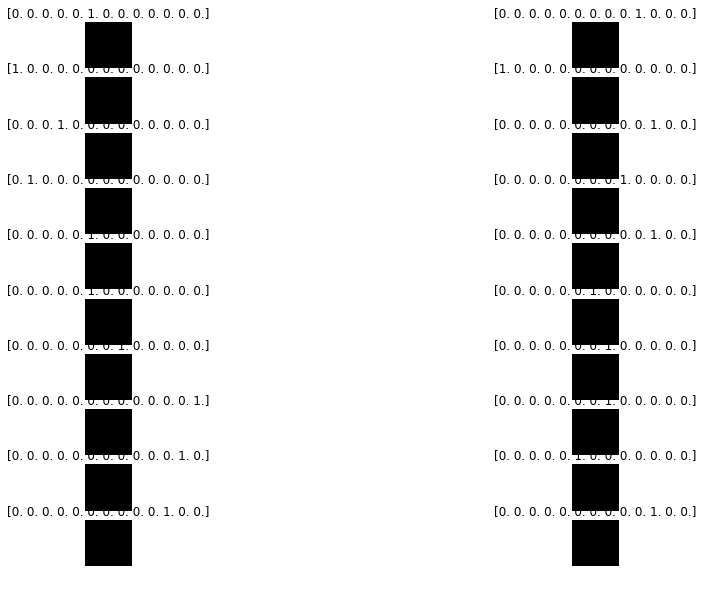

In [18]:
# Batches in 20
plots(imgs, titles = labels)

# Bulid and train

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
test_labels_1 = test_labels[:,12]
test_labels_1

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.], dtype=float32)

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# VGG16

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
classifier = Sequential()
for layer in vgg16_model.layers:
    classifier.add(layer)

In [21]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
type(classifier)

keras.models.Sequential

In [23]:
classifier.layers.pop()

In [24]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [25]:
#freeze the top layers
for layer in classifier.layers:
    layer.trainable = False

In [26]:
classifier.add(Dense(units = 13, activation = 'softmax'))  # 13 classes


In [27]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Train with VGG16 on class 13

In [28]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
classifier.fit_generator(train_batches, steps_per_epoch = 20, 
                         validation_data = valid_batches, validation_steps = 20, epochs = 170, verbose = 2)

Epoch 1/170


/home/ec2-user/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 127s - loss: 2.5106 - acc: 0.2950 - val_loss: 2.5164 - val_acc: 0.2450
Epoch 2/170
 - 126s - loss: 2.4883 - acc: 0.3150 - val_loss: 2.4906 - val_acc: 0.2350
Epoch 3/170
 - 126s - loss: 2.4704 - acc: 0.2725 - val_loss: 2.4769 - val_acc: 0.2300
Epoch 4/170
 - 125s - loss: 2.4416 - acc: 0.3499 - val_loss: 2.4520 - val_acc: 0.2550
Epoch 5/170
 - 126s - loss: 2.4215 - acc: 0.3150 - val_loss: 2.4339 - val_acc: 0.2625
Epoch 6/170
 - 126s - loss: 2.4015 - acc: 0.3325 - val_loss: 2.4133 - val_acc: 0.2550
Epoch 7/170
 - 126s - loss: 2.3956 - acc: 0.3025 - val_loss: 2.3924 - val_acc: 0.2675
Epoch 8/170
 - 126s - loss: 2.3582 - acc: 0.3675 - val_loss: 2.3839 - val_acc: 0.2525
Epoch 9/170
 - 126s - loss: 2.3442 - acc: 0.3325 - val_loss: 2.3576 - val_acc: 0.2625
Epoch 10/170
 - 126s - loss: 2.3390 - acc: 0.2925 - val_loss: 2.3561 - val_acc: 0.2575
Epoch 11/170
 - 126s - loss: 2.3352 - acc: 0.3475 - val_loss: 2.3387 - val_acc: 0.2600
Epoch 12/170
 - 126s - loss: 2.3090 - acc: 0.3300 - val_loss: 2.

KeyboardInterrupt: 

In [31]:
pred = classifier.predict_generator(test_batches, steps=1, verbose=0)

Confusion matrix, without normalization
[[ 5  0  0  0  0  1  0  0  0  0  2  0  2]
 [ 1  0  0  0  0  8  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  9]
 [10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  1]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 9  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  5  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  2]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10]]


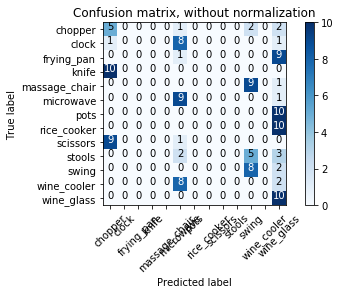

In [36]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['chopper','clock','frying_pan','knife','massage_chair','microwave',
                                                                  'pots','rice_cooker','scissors','stools','swing','wine_cooler','wine_glass'],
                      title='Confusion matrix, without normalization')